In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline

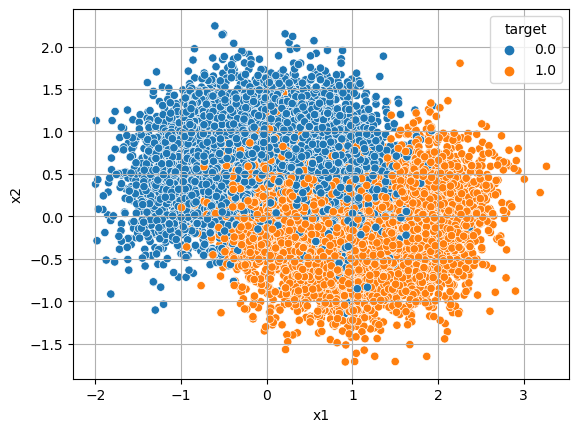

In [28]:
from sklearn.datasets import make_moons

data = make_moons(n_samples=10000, noise=0.4)
X, y = data[0], data[1]
df = pd.DataFrame(np.c_[X, y], columns=['x1', 'x2', 'target'])
sns.scatterplot(df, x='x1', y='x2', hue='target')
plt.grid()
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_reg = DecisionTreeClassifier()

param_grid = [
    {'criterion':['gini'], 'max_depth':[2, 5, 10, 20, 40, 100], 'min_samples_split':[1, 4, 8, 16, 32, 240], 'min_samples_leaf':[5, 15, 30, 45, 60, 100], 'max_leaf_nodes':[4, 12, 32, 62, 120, 300]},
    {'criterion':['entropy'], 'max_depth':[2, 5, 10, 20, 40, 100], 'min_samples_split':[1, 4, 8, 16, 32, 240], 'min_samples_leaf':[5, 15, 30, 45, 60, 100], 'max_leaf_nodes':[4, 12, 32, 62, 120, 300]}
]

grid_search = GridSearchCV(tree_reg, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'criterion': ['gini'],
                          'max_depth': [2, 5, 10, 20, 40, 100],
                          'max_leaf_nodes': [4, 12, 32, 62, 120, 300],
                          'min_samples_leaf': [5, 15, 30, 45, 60, 100],
                          'min_samples_split': [1, 4, 8, 16, 32, 240]},
                         {'criterion': ['entropy'],
                          'max_depth': [2, 5, 10, 20, 40, 100],
                          'max_leaf_nodes': [4, 12, 32, 62, 120, 300],
                          'min_samples_leaf': [5, 15, 30, 45, 60, 100],
                          'min_samples_split': [1, 4, 8, 16, 32, 240]}],
             scoring='accuracy')

In [31]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=32, min_samples_leaf=15,
                       min_samples_split=4)

In [33]:
best_model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=32, min_samples_leaf=15, min_samples_split=4)

best_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=32, min_samples_leaf=15,
                       min_samples_split=4)

In [34]:
from sklearn.metrics import accuracy_score

y_pred = best_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.864

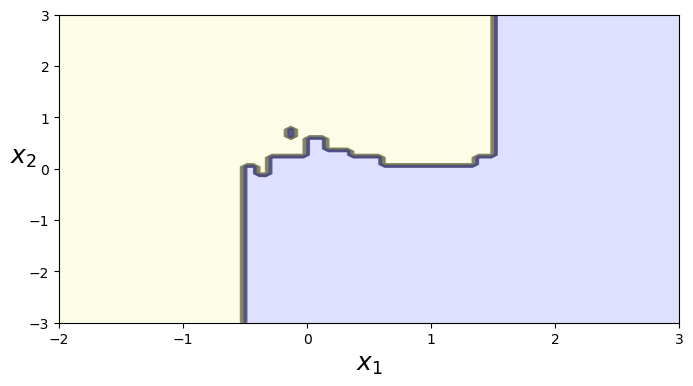

In [36]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-2, 3, -3, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=0.2)
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=0.2)
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(best_model, X, y, iris=False, plot_training=False)

In [27]:
from sklearn.tree import export_graphviz
export_graphviz(
            best_model,
            out_file="images/moon_tree.dot",
            feature_names=df.columns[:-1],
            class_names=['1', '2'],
            rounded=True,
            filled=True
)